In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import time
path_data1 = 'D:/DATA/OBIC/'
path_data2 = 'C:/Users/1234/DATA/'
data_apo = fits.open(path_data1 + 'APOGEE/APOGEE_DR14.fits')
# data_apo = fits.open(path_data1 + 'apogee_DR13.fits')

In [2]:
#data_apo[1].data
#data_apo[1].header

In [3]:
start_time = time.time()
f = data_apo[1].data
# change into bin_test
##bine = bin(f['APOGEE_TARGET1'][10000]) #(test)

print(time.time() - start_time)

18.36970591545105


In [4]:
lens = len(f['APOGEE2_TARGET3'])
print(lens)
# for lines in f['APOGEE_TARGET1']:
#     print(lines)
#lens1 = len(f[f['APOGEE_TARGET1']==0])

277371


In [5]:
# for i in range(100):
#     if f['APOGEE2_TARGET1'][i] != 0:
#         print(str(f['APOGEE2_TARGET1'][i])[0])


In [13]:
#give an def to test the bitmasks
#def v2.0.
def bitjudge(bitmasks,digit):
    #bitmasks is the string convert from data
    #digit can be a list or int
    if bitmasks >= 0:
        output_bool = False
    else:
        magic_number = -4294967296
        bitmasks_use = bitmasks - magic_number
        c = 0 # for judgment(combination)
        if type(digit) == int:
            test_bin = '1' + digit*'0'
            test_dec = int(test_bin,2)
            c = test_dec & bitmasks_use;
        elif type(digit) == list:
            test_bin = 0
            for elements in digit:
                test_bin_line = int('1' + elements * '0') # change to int
                test_bin = test_bin + test_bin_line #test_bin is still an int now
            test_dec = int(str(test_bin),2) #str it then int test_bin to dec
            c = test_dec & bitmasks_use;
        else:
            print('something seems wrong(not int or list)')
        #test if c == the dec we need
        if c == test_dec:
            output_bool = True
        else:
            output_bool = False
    return output_bool

In [18]:
start_time = time.time()
# try to figure out both apo1 and apo2
# just figure out which are included in the apogee_massive_programme

# j = 0
# k = 0

o_num = 0
t_num = 0
standard_len = 34 # used to use this method to judge which bitmasks are True
rangefigure = lens #lens is for the whole apogee
#apogee2_target3_bitmasks9_massivestarprogramme
for i in range(rangefigure):
    apo1_tar1 = f['APOGEE_TARGET1'][i]
    #print('1:',apo1_tar1)
    apo2_tar3 = f['APOGEE2_TARGET3'][i]
    #print('2:',apo2_tar3)
    if bitjudge(apo1_tar1,25):
        o_num = o_num + 1
    if bitjudge(apo2_tar3,9):
        t_num = t_num + 1
#     not finished
print('from APOGEE1:',o_num)
print('from APOGEE2:',t_num)
#are the bitmasks right? - bitmasks are right >.<
print('time consumed: ' + str(time.time() - start_time))

from APOGEE1: 162
from APOGEE2: 9
time consumed: 22.729011297225952


In [19]:
# massive ratio
print((o_num + t_num) / lens)

0.0006165028067101464


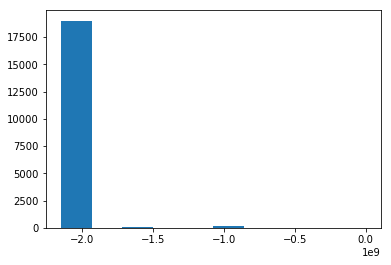

In [9]:
plt.hist(f['APOGEE_TARGET1'])
plt.show()